In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys 
sys.path.append('../utils')
import plot_utils

# Load Data

In [2]:
data_path = "../../data/shap/"

## Fine-tuned bert

In [3]:
grouped_bert_shap_df = pd.concat([
    pd.read_csv(data_path + "bert_test_shap-values_grouped_tokens.csv", index_col=0), 
    pd.read_csv(data_path + "bert_test_shap-values_grouped_bigrams.csv", index_col=0)
])
grouped_bert_shap_df

,shap_neg,shap_neut,shap_pos
token,,,
!,0.007913,-0.124836,0.116923
!,-0.002699,-0.038225,0.040924
"""",-0.001368,-0.001947,0.003315
(,-0.001456,0.003790,-0.002334
),0.001822,-0.004706,0.002884
...,...,...,...
’+s,0.000164,-0.002108,0.001944
“+B,0.014943,-0.010519,-0.004424
“+Mei,-0.008718,0.016785,-0.008067


## Fine-tuned gbert

In [4]:
grouped_gbert_shap_df = pd.concat([
    pd.read_csv(data_path + "gbert_test_shap-values_grouped_tokens.csv", index_col=0), 
    pd.read_csv(data_path + "gbert_test_shap-values_grouped_bigrams.csv", index_col=0)
])
grouped_gbert_shap_df

,shap_neg,shap_neut,shap_pos
token,,,
!,0.000018,-0.032862,0.032844
!,-0.001365,0.000405,0.000960
"""",0.000479,0.000283,-0.000762
(,0.000003,-0.000758,0.000755
),-0.000791,0.001784,-0.000993
...,...,...,...
’+s,0.031522,-0.037402,0.005880
“+Bran,-0.001555,-0.015329,0.016884
“+Mein,-0.001148,-0.001153,0.002302


# Merge Tokens with Bigrams and Plot

In [5]:
def format_barplot(ax, xlabel, ylabel):
    ax.set_facecolor("white")
    ax.spines['top'].set_color("white")
    ax.spines['right'].set_color("white")

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(12)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(12)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)

    ax.set(xlim=(0, 1))

def get_top_n_bar_plot(grouped_shap_df, column, n, colors):
    data = grouped_shap_df.sort_values(column, ascending=False).head(n)[column]
    if column in colors:
        color = colors[column]
    else:
        color = "black"
    return sns.barplot(data, orient="y", color=color)

colors = {
    "shap_neg": "#bf0041",
    "shap_neut": "grey",
    "shap_pos": "#00a933"
}

## Fine-tuned bert

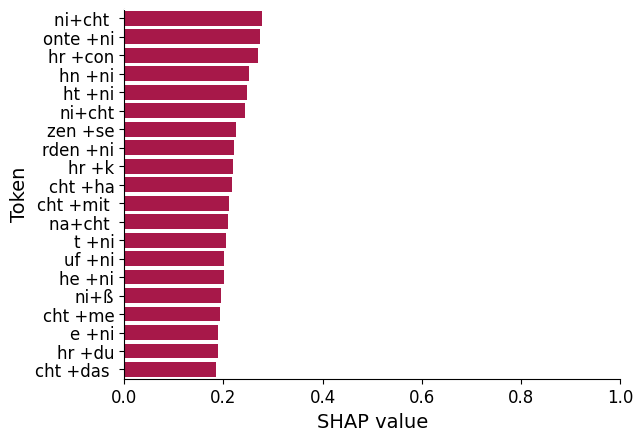

In [6]:
ax = get_top_n_bar_plot(grouped_bert_shap_df, "shap_neg", 20, colors)
format_barplot(ax, "SHAP value", "Token");

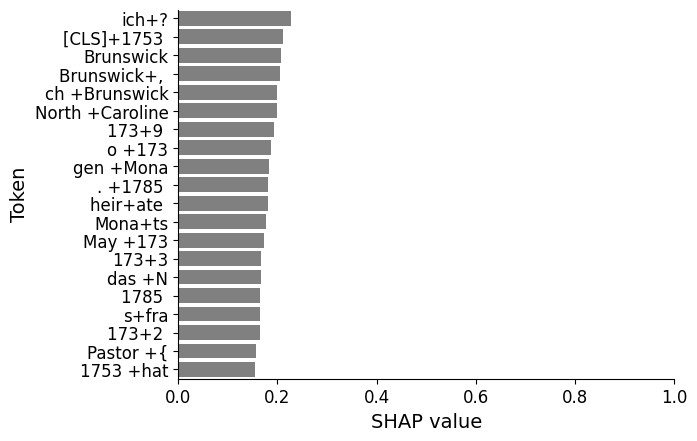

In [7]:
ax = get_top_n_bar_plot(grouped_bert_shap_df, "shap_neut", 20, colors)
format_barplot(ax, "SHAP value", "Token");

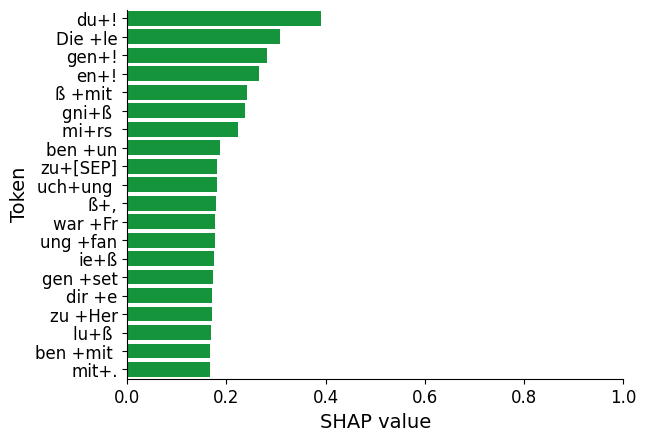

In [8]:
ax = get_top_n_bar_plot(grouped_bert_shap_df, "shap_pos", 20, colors)
format_barplot(ax, "SHAP value", "Token");

## Fine-tuned gbert

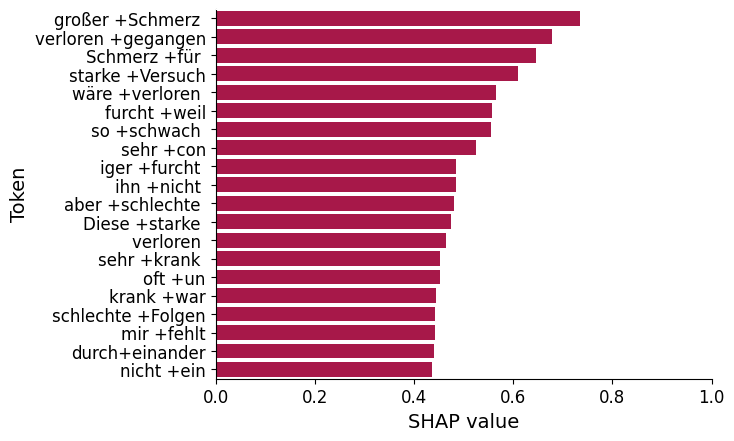

In [9]:
ax = get_top_n_bar_plot(grouped_gbert_shap_df, "shap_neg", 20, colors)
format_barplot(ax, "SHAP value", "Token");

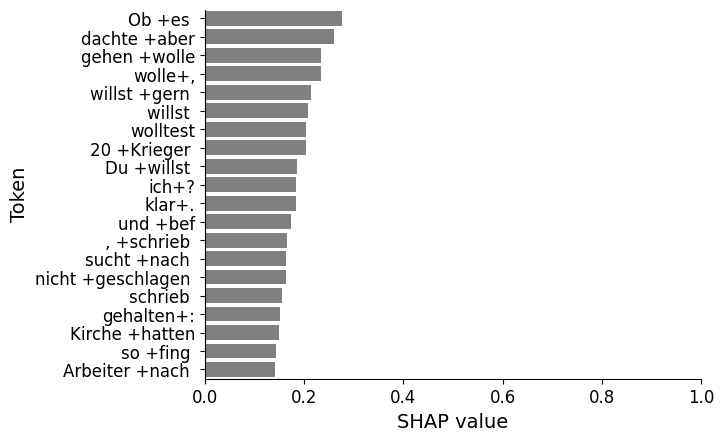

In [10]:
ax = get_top_n_bar_plot(grouped_gbert_shap_df, "shap_neut", 20, colors)
format_barplot(ax, "SHAP value", "Token");

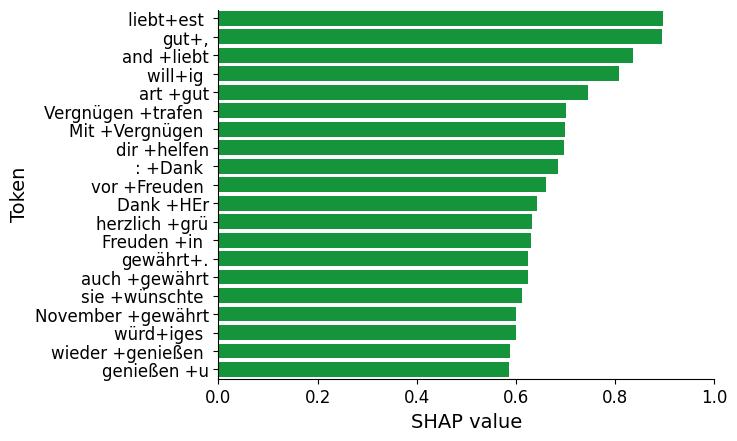

In [11]:
ax = get_top_n_bar_plot(grouped_gbert_shap_df, "shap_pos", 20, colors)
format_barplot(ax, "SHAP value", "Token");